In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('rnn_data.csv')

In [15]:
# Getting training set
dataset_train = df[0:int(0.8*len(df))]

# Taking one column, in this case LONGITUDE
training_set = dataset_train.iloc[:, [0]].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
310/310 [==============================] - 7s 22ms/step - loss: 0.2027
Epoch 2/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0368
Epoch 3/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0165
Epoch 4/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0090
Epoch 5/15
310/310 [==============================] - 3s 8ms/step - loss: 0.0067
Epoch 6/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0050
Epoch 7/15
310/310 [==============================] - 3s 8ms/step - loss: 0.0046
Epoch 8/15
310/310 [==============================] - 3s 8ms/step - loss: 0.0054
Epoch 9/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0040
Epoch 10/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0044
Epoch 11/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0056
Epoch 12/15
310/310 [==============================] - 2s 8ms/step - loss: 0.0060
Epoch 13/15
310/310 [===

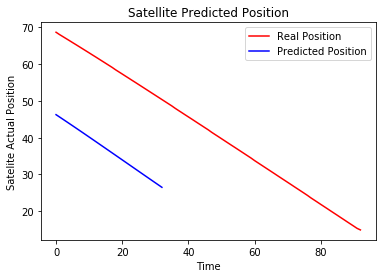

In [19]:
# Getting test data
dataset_test = df[int(0.8*len(df)):len(df)+1]
testing_set = dataset_test.iloc[:, [0]].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
testing_set_scaled = sc.fit_transform(testing_set)

# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []
for i in range(60, len(testing_set)):
    X_test.append(testing_set_scaled[i-60:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_position = regressor.predict(X_test)
predicted_position = sc.inverse_transform(predicted_position)

# Visualising the results
plt.plot(testing_set, color = 'red', label = 'Real Position')
plt.plot(predicted_position, color = 'blue', label = 'Predicted Position')
plt.title('Satellite Predicted Position')
plt.xlabel('Time')
plt.ylabel('Satelite Actual Position')
plt.legend()
plt.show()